# CLUSTERING ON DIFFERENT DATASETS
***

# Section: Overview

In this project, clustering based on three datasets will be performed by suitable clustering algorithms and each clustering will be evaluated.

small_Xydf.csv, large1_Xydf.csv, and large2_Xydf.csv are the three datasets using in this lab. They are all two-dimensional datasets contain columns X0, X1, and y with 100, 2000, and 2000 records, respectively. The column y, which will be used to evaluated the clustering algorithm, is the actual cluster number that was produced by the dataset generation algorithm.

***
# Section: Setup
- The following python libraries and functions are imported to help analyze the dataset.
***

In [194]:
import pandas as pd
import numpy as np
import sklearn as sk
import time
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
small_Xydf = pd.read_csv("small_Xydf.csv") 
large1_Xydf = pd.read_csv("large1_Xydf.csv") 
large2_Xydf = pd.read_csv("large2_Xydf.csv") 

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset

***
## Section: 1.1 - Calculate True Cluster Measures
Base on the given y, the WSS is 625.1315700468001, the BSS is 3986.441329795858, and the SSE is 4611.572899842658.
***

In [3]:
y = np.array(small_Xydf)
actual_y = np.array(small_Xydf['y'])
y0 = np.array(small_Xydf[small_Xydf['y'].isin(['0'])])
y1 = np.array(small_Xydf[small_Xydf['y'].isin(['1'])])
y2 = np.array(small_Xydf[small_Xydf['y'].isin(['2'])])

y = y[:, 1:-1]
y0 = y0[:, 1:-1]
y1 = y1[:, 1:-1]
y2 = y2[:, 1:-1]

y0_mean = [0, 0]
y1_mean = [0, 0]
y2_mean = [0, 0]
y_mean = [0, 0]
WSS = 0

for i in range(100):
    y_mean[0] += y[i,0]
    y_mean[1] += y[i,1]
for i in range(y0.shape[0]):
    y0_mean[0] += y0[i,0]
    y0_mean[1] += y0[i,1]
for i in range(y1.shape[0]):
    y1_mean[0] += y1[i,0]
    y1_mean[1] += y1[i,1]
for i in range(y2.shape[0]):
    y2_mean[0] += y2[i,0]
    y2_mean[1] += y2[i,1]

y0_mean[0] = y0_mean[0]/y0.shape[0]
y0_mean[1] = y0_mean[1]/y0.shape[0]
y1_mean[0] = y1_mean[0]/y1.shape[0]
y1_mean[1] = y1_mean[1]/y1.shape[0]
y2_mean[0] = y2_mean[0]/y2.shape[0]
y2_mean[1] = y2_mean[1]/y2.shape[0]
y_mean[0] = y_mean[0]/100
y_mean[1] = y_mean[1]/100

for i in range(y0.shape[0]):
    WSS += (y0[i,0] - y0_mean[0])*(y0[i,0] - y0_mean[0]) + (y0[i,1] - y0_mean[1])*(y0[i,1] - y0_mean[1])
for i in range(y1.shape[0]):
    WSS += (y1[i,0] - y1_mean[0])*(y1[i,0] - y1_mean[0]) + (y1[i,1] - y1_mean[1])*(y1[i,1] - y1_mean[1])
for i in range(y2.shape[0]):
    WSS += (y2[i,0] - y2_mean[0])*(y2[i,0] - y2_mean[0]) + (y2[i,1] - y2_mean[1])*(y2[i,1] - y2_mean[1])
    
BSS = ((y_mean[0]-y0_mean[0])*(y_mean[0]-y0_mean[0])+(y_mean[1]-y0_mean[1])*(y_mean[1]-y0_mean[1]))*y0.shape[0] + ((y_mean[0]-y1_mean[0])*(y_mean[0]-y1_mean[0])+(y_mean[1]-y1_mean[1])*(y_mean[1]-y1_mean[1]))*y1.shape[0] + ((y_mean[0]-y2_mean[0])*(y_mean[0]-y2_mean[0])+(y_mean[1]-y2_mean[1])*(y_mean[1]-y2_mean[1]))*y2.shape[0]

SSE = WSS + BSS

print("WSS is", WSS)
print("BSS is", BSS)
print("SSE is", SSE)

WSS is 625.1315700468001
BSS is 3986.441329795858
SSE is 4611.572899842658


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- n_clusters is the number of clusters to form as well as the number of centroids to generate. I set it to 3 as default value, but I will change it to 2 and 4 for testing the K-Means algorithm's performance with different numbers of clusters.
- init is method for initialization. I set it to it's default value 'k-means++'.
- n_init is number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. I set it to it's default value.
- max_iter is maximum number of iterations of the k-means algorithm for a single run. I set it to it's default value.
- tol is relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence. I set it to it's default value.
- precompute_distances is precompute distances (faster but takes more memory). It has 3 options as I list as follow. ‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision; True : always precompute distances; False : never precompute distances. I set it to it's default value.
- verbose is verbosity mode. I set it to it's default value.
- random_state determines random number generation for centroid initialization. Use an int to make the randomness deterministic. I set it to it's default value.
- copy_x: When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False. I set it to it's default value.
- n_jobs is the number of OpenMP threads to use for the computation. Parallelism is sample-wise on the main cython loop which assigns each sample to its closest center. None or -1 means using all processors. I set it to it's default value.
- algorithm is K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient on data with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters). I set it to it's default value.

In the situation that K = 2, the WSS is 1212.588397254632, the BSS is 3398.984502588026, the SSE is 4611.5728998426575, and the running time is 0.02383299999999977.

In the situation that K = 3, the WSS is 616.5037785142407, the BSS is 3995.069121328418, the SSE is 4611.572899842658, and the running time is 0.0278199999999984.

In the situation that K = 4，the WSS is 515.2170844984329, the BSS is 4096.355815344226, the SSE is 4611.572899842659, and the running time is 0.04805099999999918.

Reference: sklearn.cluster.KMeans documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
***

In [4]:
KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
             precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, 
             n_jobs='deprecated', algorithm='auto')

X = small_Xydf.iloc[:, 1:-1]
X = X.to_numpy()

In [5]:
# k = 2
t0 = time.process_time()
kmeans = KMeans(n_clusters = 2).fit(X)
y_k2_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k2 = t1-t0 #running time

In [6]:
WSS_k2 = 0
BSS_k2 = 0

y0_k2 = np.empty(shape=[0, 2])
y1_k2 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k2_kmeans[i] == 0:
        y0_k2 = np.vstack((y0_k2,X[i]))
    elif y_k2_kmeans[i] == 1:
        y1_k2 = np.vstack((y1_k2,X[i]))

y0_k2_mean = [0, 0]
y1_k2_mean = [0, 0]
for i in range(y0_k2.shape[0]):
    y0_k2_mean[0] += y0_k2[i,0]
    y0_k2_mean[1] += y0_k2[i,1]
for i in range(y1_k2.shape[0]):
    y1_k2_mean[0] += y1_k2[i,0]
    y1_k2_mean[1] += y1_k2[i,1]
    
y0_k2_mean[0] = y0_k2_mean[0]/y0_k2.shape[0]
y0_k2_mean[1] = y0_k2_mean[1]/y0_k2.shape[0]
y1_k2_mean[0] = y1_k2_mean[0]/y1_k2.shape[0]
y1_k2_mean[1] = y1_k2_mean[1]/y1_k2.shape[0]

for i in range(y0_k2.shape[0]):
    WSS_k2 += (y0_k2[i,0] - y0_k2_mean[0])*(y0_k2[i,0] - y0_k2_mean[0]) + (y0_k2[i,1] - y0_k2_mean[1])*(y0_k2[i,1] - y0_k2_mean[1])
for i in range(y1_k2.shape[0]):
    WSS_k2 += (y1_k2[i,0] - y1_k2_mean[0])*(y1_k2[i,0] - y1_k2_mean[0]) + (y1_k2[i,1] - y1_k2_mean[1])*(y1_k2[i,1] - y1_k2_mean[1])

BSS_k2 = ((y_mean[0]-y0_k2_mean[0])*(y_mean[0]-y0_k2_mean[0])+(y_mean[1]-y0_k2_mean[1])*(y_mean[1]-y0_k2_mean[1]))*y0_k2.shape[0] + ((y_mean[0]-y1_k2_mean[0])*(y_mean[0]-y1_k2_mean[0])+(y_mean[1]-y1_k2_mean[1])*(y_mean[1]-y1_k2_mean[1]))*y1_k2.shape[0]

SSE_k2 = WSS_k2 + BSS_k2

print("K = 2: ")
print("WSS is", WSS_k2)
print("BSS is", BSS_k2)
print("SSE is", SSE_k2)
print("Running time is", t_k2)

K = 2: 
WSS is 1212.588397254632
BSS is 3398.984502588026
SSE is 4611.5728998426575
Running time is 0.027187000000000072


In [7]:
# k=3
t0 = time.process_time()
kmeans = KMeans(n_clusters = 3).fit(X)
y_k3_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k3 = t1-t0 #running time

In [8]:
WSS_k3 = 0
BSS_k3 = 0

y0_k3 = np.empty(shape=[0, 2])
y1_k3 = np.empty(shape=[0, 2])
y2_k3 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k3_kmeans[i] == 0:
        y0_k3 = np.vstack((y0_k3,X[i]))
    elif y_k3_kmeans[i] == 1:
        y1_k3 = np.vstack((y1_k3,X[i]))
    elif y_k3_kmeans[i] == 2:
        y2_k3 = np.vstack((y2_k3,X[i]))
        
y0_k3_mean = [0, 0]
y1_k3_mean = [0, 0]
y2_k3_mean = [0, 0]
for i in range(y0_k3.shape[0]):
    y0_k3_mean[0] += y0_k3[i,0]
    y0_k3_mean[1] += y0_k3[i,1]
for i in range(y1_k3.shape[0]):
    y1_k3_mean[0] += y1_k3[i,0]
    y1_k3_mean[1] += y1_k3[i,1]
for i in range(y2_k3.shape[0]):
    y2_k3_mean[0] += y2_k3[i,0]
    y2_k3_mean[1] += y2_k3[i,1]
    
y0_k3_mean[0] = y0_k3_mean[0]/y0_k3.shape[0]
y0_k3_mean[1] = y0_k3_mean[1]/y0_k3.shape[0]
y1_k3_mean[0] = y1_k3_mean[0]/y1_k3.shape[0]
y1_k3_mean[1] = y1_k3_mean[1]/y1_k3.shape[0]
y2_k3_mean[0] = y2_k3_mean[0]/y2_k3.shape[0]
y2_k3_mean[1] = y2_k3_mean[1]/y2_k3.shape[0]

for i in range(y0_k3.shape[0]):
    WSS_k3 += (y0_k3[i,0] - y0_k3_mean[0])*(y0_k3[i,0] - y0_k3_mean[0]) + (y0_k3[i,1] - y0_k3_mean[1])*(y0_k3[i,1] - y0_k3_mean[1])
for i in range(y1_k3.shape[0]):
    WSS_k3 += (y1_k3[i,0] - y1_k3_mean[0])*(y1_k3[i,0] - y1_k3_mean[0]) + (y1_k3[i,1] - y1_k3_mean[1])*(y1_k3[i,1] - y1_k3_mean[1])
for i in range(y2_k3.shape[0]):
    WSS_k3 += (y2_k3[i,0] - y2_k3_mean[0])*(y2_k3[i,0] - y2_k3_mean[0]) + (y2_k3[i,1] - y2_k3_mean[1])*(y2_k3[i,1] - y2_k3_mean[1])


BSS_k3 = ((y_mean[0]-y0_k3_mean[0])*(y_mean[0]-y0_k3_mean[0])+(y_mean[1]-y0_k3_mean[1])*(y_mean[1]-y0_k3_mean[1]))*y0_k3.shape[0] + ((y_mean[0]-y1_k3_mean[0])*(y_mean[0]-y1_k3_mean[0])+(y_mean[1]-y1_k3_mean[1])*(y_mean[1]-y1_k3_mean[1]))*y1_k3.shape[0] + ((y_mean[0]-y2_k3_mean[0])*(y_mean[0]-y2_k3_mean[0])+(y_mean[1]-y2_k3_mean[1])*(y_mean[1]-y2_k3_mean[1]))*y2_k3.shape[0]

SSE_k3 = WSS_k3 + BSS_k3

print("K = 3: ")
print("WSS is", WSS_k3)
print("BSS is", BSS_k3)
print("SSE is", SSE_k3)
print("Running time is", t_k3)

K = 3: 
WSS is 616.5037785142409
BSS is 3995.069121328418
SSE is 4611.572899842659
Running time is 0.029418999999999862


In [9]:
# k=4
t0 = time.process_time()
kmeans = KMeans(n_clusters = 4).fit(X)
y_k4_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k4 = t1-t0 #running time

In [10]:
WSS_k4 = 0
BSS_k4 = 0

y0_k4 = np.empty(shape=[0, 2])
y1_k4 = np.empty(shape=[0, 2])
y2_k4 = np.empty(shape=[0, 2])
y3_k4 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k4_kmeans[i] == 0:
        y0_k4 = np.vstack((y0_k4,X[i]))
    elif y_k4_kmeans[i] == 1:
        y1_k4 = np.vstack((y1_k4,X[i]))
    elif y_k4_kmeans[i] == 2:
        y2_k4 = np.vstack((y2_k4,X[i]))
    elif y_k4_kmeans[i] == 3:
        y3_k4 = np.vstack((y3_k4,X[i]))
        
y0_k4_mean = [0, 0]
y1_k4_mean = [0, 0]
y2_k4_mean = [0, 0]
y3_k4_mean = [0, 0]
for i in range(y0_k4.shape[0]):
    y0_k4_mean[0] += y0_k4[i,0]
    y0_k4_mean[1] += y0_k4[i,1]
for i in range(y1_k4.shape[0]):
    y1_k4_mean[0] += y1_k4[i,0]
    y1_k4_mean[1] += y1_k4[i,1]
for i in range(y2_k4.shape[0]):
    y2_k4_mean[0] += y2_k4[i,0]
    y2_k4_mean[1] += y2_k4[i,1]
for i in range(y3_k4.shape[0]):
    y3_k4_mean[0] += y3_k4[i,0]
    y3_k4_mean[1] += y3_k4[i,1]
    
y0_k4_mean[0] = y0_k4_mean[0]/y0_k4.shape[0]
y0_k4_mean[1] = y0_k4_mean[1]/y0_k4.shape[0]
y1_k4_mean[0] = y1_k4_mean[0]/y1_k4.shape[0]
y1_k4_mean[1] = y1_k4_mean[1]/y1_k4.shape[0]
y2_k4_mean[0] = y2_k4_mean[0]/y2_k4.shape[0]
y2_k4_mean[1] = y2_k4_mean[1]/y2_k4.shape[0]
y3_k4_mean[0] = y3_k4_mean[0]/y3_k4.shape[0]
y3_k4_mean[1] = y3_k4_mean[1]/y3_k4.shape[0]

for i in range(y0_k4.shape[0]):
    WSS_k4 += (y0_k4[i,0] - y0_k4_mean[0])*(y0_k4[i,0] - y0_k4_mean[0]) + (y0_k4[i,1] - y0_k4_mean[1])*(y0_k4[i,1] - y0_k4_mean[1])
for i in range(y1_k4.shape[0]):
    WSS_k4 += (y1_k4[i,0] - y1_k4_mean[0])*(y1_k4[i,0] - y1_k4_mean[0]) + (y1_k4[i,1] - y1_k4_mean[1])*(y1_k4[i,1] - y1_k4_mean[1])
for i in range(y2_k4.shape[0]):
    WSS_k4 += (y2_k4[i,0] - y2_k4_mean[0])*(y2_k4[i,0] - y2_k4_mean[0]) + (y2_k4[i,1] - y2_k4_mean[1])*(y2_k4[i,1] - y2_k4_mean[1])
for i in range(y3_k4.shape[0]):
    WSS_k4 += (y3_k4[i,0] - y3_k4_mean[0])*(y3_k4[i,0] - y3_k4_mean[0]) + (y3_k4[i,1] - y3_k4_mean[1])*(y3_k4[i,1] - y3_k4_mean[1])

BSS_k4 = ((y_mean[0]-y0_k4_mean[0])*(y_mean[0]-y0_k4_mean[0])+(y_mean[1]-y0_k4_mean[1])*(y_mean[1]-y0_k4_mean[1]))*y0_k4.shape[0] + ((y_mean[0]-y1_k4_mean[0])*(y_mean[0]-y1_k4_mean[0])+(y_mean[1]-y1_k4_mean[1])*(y_mean[1]-y1_k4_mean[1]))*y1_k4.shape[0] + ((y_mean[0]-y2_k4_mean[0])*(y_mean[0]-y2_k4_mean[0])+(y_mean[1]-y2_k4_mean[1])*(y_mean[1]-y2_k4_mean[1]))*y2_k4.shape[0] + ((y_mean[0]-y3_k4_mean[0])*(y_mean[0]-y3_k4_mean[0])+(y_mean[1]-y3_k4_mean[1])*(y_mean[1]-y3_k4_mean[1]))*y3_k4.shape[0]

SSE_k4 = WSS_k4 + BSS_k4

print("K = 4: ")
print("WSS is", WSS_k4)
print("BSS is", BSS_k4)
print("SSE is", SSE_k4)
print("Running time is", t_k4)

K = 4: 
WSS is 518.3810167596873
BSS is 4093.191883082972
SSE is 4611.572899842659
Running time is 0.03827299999999978


***
## Section: 1.3 - For the K=3 Case Above:

The scatterplots of cluster produced by K-Means algorithm with K=3 and the true cluster are showing below.

The confusion matrix is showing below. We can see that the K-Means algorithm with K=3 only made one mistake that put a point to cluster 2 while the point should belong to cluster 1. And as the report matrix showing below, the precision, recall, F1, and accuracy are all 0.99.
***

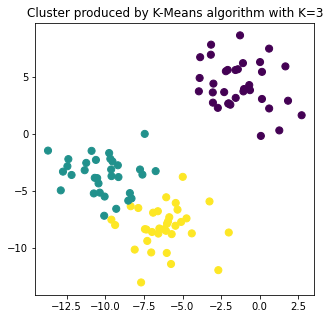

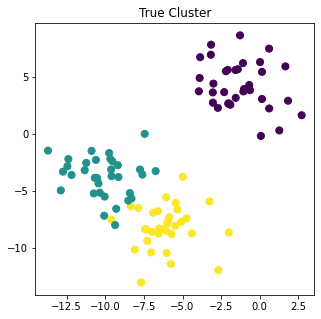

In [11]:
# y_k3_kmeans (1-->0, 2-->1, 0-->2)
for i in range(y_k3_kmeans.shape[0]):
    if y_k3_kmeans[i] == 1:
        y_k3_kmeans[i] = 0
    elif y_k3_kmeans[i] == 2:
        y_k3_kmeans[i] = 1
    elif y_k3_kmeans[i] == 0:
        y_k3_kmeans[i] = 2
        
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_k3_kmeans, s=50, cmap='viridis')
plt.title('Cluster produced by K-Means algorithm with K=3')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=actual_y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

In [12]:
conf_matrix = confusion_matrix(actual_y, y_k3_kmeans, labels=[0, 1, 2])
print(conf_matrix)
print(classification_report(actual_y, y_k3_kmeans))

[[34  0  0]
 [ 0 32  1]
 [ 0  0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.97      0.98        33
           2       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



***
## Section: 1.4 - Record Your Observations

Base on these experiments, K-Means algorithm works well when dataset is small since the accuracy, precision, and f1-score of the predicted y are high. And I also notice that the higher the K value, the lower the WSS; the higher the K value, the higher the BSS and the higher the running time. 

I preferred the clustering with K = 3. From the graph of WSS, we can see that the WSS of clustering with K = 3 is almost twice as low as the WSS of clustering with K = 2 while the difference between the WSS of clustering with K = 3 and the WSS of clustering with K = 4 is relatively indistinguishable. And the BSS of clustering with K = 3 is much higher than the BSS of clustering with K = 2 while the difference between the BSS of clustering with K = 3 and the BSS of clustering with K = 4 is relatively small. The running time of clustering with K = 3 is just a little bit longer than the running time of clustering with K = 2 while the running time of clustering with K = 4 is relatively much longer than the running time of clustering with K = 3. So we can conclude that the clustering with K = 3 performs better and spends relatively little time.
***

<ipython-input-13-5e856db61f4f>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


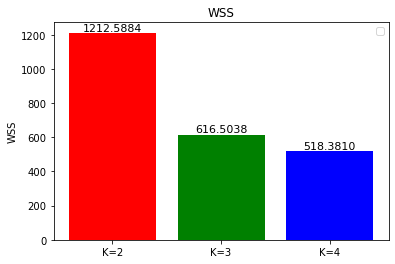

<ipython-input-13-5e856db61f4f>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


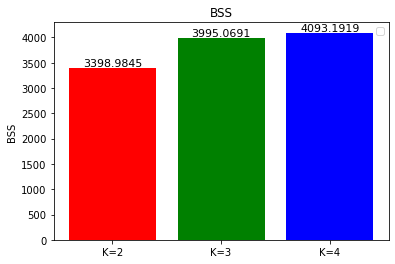

<ipython-input-13-5e856db61f4f>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(sse_list)), sse_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


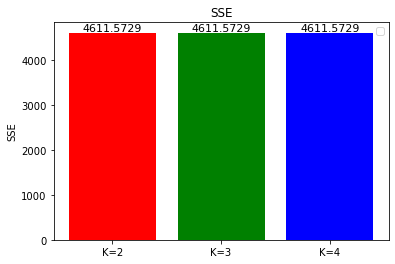

<ipython-input-13-5e856db61f4f>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


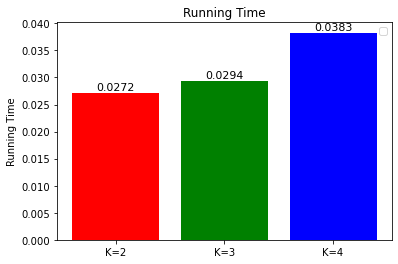

In [13]:
name_list = ['K=2','K=3','K=4']
wss_list = [WSS_k2,WSS_k3,WSS_k4]
bss_list = [BSS_k2,BSS_k3,BSS_k4]
sse_list = [SSE_k2,SSE_k3,SSE_k4]
t_list = [t_k2,t_k3,t_k4]

plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
plt.text(0, WSS_k2+0.05, format(WSS_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, WSS_k3+0.05, format(WSS_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, WSS_k4+0.05, format(WSS_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('WSS')
plt.ylabel('WSS')
plt.legend()
plt.show()

plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
plt.text(0, BSS_k2+0.05, format(BSS_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, BSS_k3+0.05, format(BSS_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, BSS_k4+0.05, format(BSS_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('BSS')
plt.ylabel('BSS')
plt.legend()
plt.show()

plt.bar(range(len(sse_list)), sse_list, color='rgb', tick_label=name_list)
plt.text(0, SSE_k2+0.05, format(SSE_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, SSE_k3+0.05, format(SSE_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, SSE_k4+0.05, format(SSE_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('SSE')
plt.ylabel('SSE')
plt.legend()
plt.show()

plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
plt.text(0, t_k2+0.0001, format(t_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, t_k3+0.0001, format(t_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, t_k4+0.0001, format(t_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('Running Time')
plt.ylabel('Running Time')
plt.legend()
plt.show()

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset


***
## Section: 2.1 - Calculate True Cluster Measures
- Base on the given y, the WSS is 3972.3153879299502, the BSS is 67712.28953700385, the SSE is 71684.6049249338
***

In [228]:
y = np.array(large1_Xydf)
actual_y = np.array(large1_Xydf['y'])
y0 = np.array(large1_Xydf[large1_Xydf['y'].isin(['0'])])
y1 = np.array(large1_Xydf[large1_Xydf['y'].isin(['1'])])
y2 = np.array(large1_Xydf[large1_Xydf['y'].isin(['2'])])
y3 = np.array(large1_Xydf[large1_Xydf['y'].isin(['3'])])
y4 = np.array(large1_Xydf[large1_Xydf['y'].isin(['4'])])
y5 = np.array(large1_Xydf[large1_Xydf['y'].isin(['5'])])
y6 = np.array(large1_Xydf[large1_Xydf['y'].isin(['6'])])
y7 = np.array(large1_Xydf[large1_Xydf['y'].isin(['7'])])

y = y[:, 1:-1]
y0 = y0[:, 1:-1]
y1 = y1[:, 1:-1]
y2 = y2[:, 1:-1]
y3 = y3[:, 1:-1]
y4 = y4[:, 1:-1]
y5 = y5[:, 1:-1]
y6 = y6[:, 1:-1]
y7 = y7[:, 1:-1]
y_mean = [0, 0]

y_cluster = np.array([y0,y1,y2,y3,y4,y5,y6,y7])

y_cluster_mean = np.zeros(shape=[8, 2])

for i in range(y_cluster.shape[0]):
    for j in range(y_cluster[i].shape[0]):
        y_cluster_mean[i,0] += y_cluster[i][j,0]
        y_cluster_mean[i,1] += y_cluster[i][j,1]
for i in range(y_cluster_mean.shape[0]):
    y_cluster_mean[i,0] = y_cluster_mean[i,0]/y_cluster[i].shape[0]
    y_cluster_mean[i,1] = y_cluster_mean[i,1]/y_cluster[i].shape[0]

for i in range(y.shape[0]):
    y_mean[0] += y[i,0]
    y_mean[1] += y[i,1]

y_mean[0] = y_mean[0]/y.shape[0]
y_mean[1] = y_mean[1]/y.shape[0]   
    
WSS = 0
for i in range(y_cluster.shape[0]):
    for j in range(y_cluster[i].shape[0]):
        WSS += (y_cluster[i][j,0] - y_cluster_mean[i,0])*(y_cluster[i][j,0] - y_cluster_mean[i,0]) + (y_cluster[i][j,1] - y_cluster_mean[i,1])*(y_cluster[i][j,1] - y_cluster_mean[i,1])

BSS = 0
for i in range(y_cluster.shape[0]):
    BSS += ((y_mean[0]-y_cluster_mean[i,0])*(y_mean[0]-y_cluster_mean[i,0])+(y_mean[1]-y_cluster_mean[i,1])*(y_mean[1]-y_cluster_mean[i,1]))*y_cluster[i].shape[0] 

SSE = WSS + BSS

print("WSS is", WSS)
print("BSS is", BSS)
print("SSE is", SSE)

WSS is 3972.3153879299502
BSS is 67712.28953700385
SSE is 71684.6049249338


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- n_clusters is the number of clusters to form as well as the number of centroids to generate. I set it to 8 as default value, but I will change it to 6 and 10 for testing the K-Means algorithm's performance with different numbers of clusters.
- init is method for initialization. I set it to it's default value 'k-means++'.
- n_init is number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. I set it to it's default value.
- max_iter is maximum number of iterations of the k-means algorithm for a single run. I set it to it's default value.
- tol is relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence. I set it to it's default value.
- precompute_distances is precompute distances (faster but takes more memory). It has 3 options as I list as follow. ‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision; True : always precompute distances; False : never precompute distances. I set it to it's default value.
- verbose is verbosity mode. I set it to it's default value.
- random_state determines random number generation for centroid initialization. Use an int to make the randomness deterministic. I set it to it's default value.
- copy_x: When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False. I set it to it's default value.
- n_jobs is the number of OpenMP threads to use for the computation. Parallelism is sample-wise on the main cython loop which assigns each sample to its closest center. None or -1 means using all processors. I set it to it's default value.
- algorithm is K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient on data with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters). I set it to it's default value.

In the situation that K = 6, the WSS is 5606.526295671686, the BSS is 66078.0786292621, the SSE is 71684.6049249338, and the running time is 0.12270000000000003

In the situation that K = 8, the WSS is 3549.1496099442666, the BSS is 68135.51638691357, the SSE is 71684.66599685783, and the running time is 0.22402199999999972

In the situation that K = 10，the WSS is 3181.7673186909933, the BSS is 68502.89867816684, the SSE is 71684.66599685783, and the running time is 0.40699799999999975

Reference: sklearn.cluster.KMeans documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
***

In [168]:
KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
             precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, 
             n_jobs='deprecated', algorithm='auto')

X = large1_Xydf.iloc[:, 1:-1]
X = X.to_numpy()

In [169]:
# k=6
t0 = time.process_time()
kmeans = KMeans(n_clusters = 6).fit(X)
y_k6_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k6 = t1-t0 #running time

In [170]:
y0_k6 = np.empty(shape=[0, 2])
y1_k6 = np.empty(shape=[0, 2])
y2_k6 = np.empty(shape=[0, 2])
y3_k6 = np.empty(shape=[0, 2])
y4_k6 = np.empty(shape=[0, 2])
y5_k6 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k6_kmeans[i] == 0:
        y0_k6 = np.vstack((y0_k6,X[i]))
    elif y_k6_kmeans[i] == 1:
        y1_k6 = np.vstack((y1_k6,X[i]))
    elif y_k6_kmeans[i] == 2:
        y2_k6 = np.vstack((y2_k6,X[i]))
    elif y_k6_kmeans[i] == 3:
        y3_k6 = np.vstack((y3_k6,X[i]))
    elif y_k6_kmeans[i] == 4:
        y4_k6 = np.vstack((y4_k6,X[i]))
    elif y_k6_kmeans[i] == 5:
        y5_k6 = np.vstack((y5_k6,X[i]))

y_k6 = np.array([y0_k6,y1_k6,y2_k6,y3_k6,y4_k6,y5_k6])

y_k6_mean = np.zeros(shape=[6, 2])

for i in range(y_k6.shape[0]):
    for j in range(y_k6[i].shape[0]):
        y_k6_mean[i,0] += y_k6[i][j,0]
        y_k6_mean[i,1] += y_k6[i][j,1]
for i in range(y_k6_mean.shape[0]):
    y_k6_mean[i,0] = y_k6_mean[i,0]/y_k6[i].shape[0]
    y_k6_mean[i,1] = y_k6_mean[i,1]/y_k6[i].shape[0]

WSS_k6 = 0
for i in range(y_k6.shape[0]):
    for j in range(y_k6[i].shape[0]):
        WSS_k6 += (y_k6[i][j,0] - y_k6_mean[i,0])*(y_k6[i][j,0] - y_k6_mean[i,0]) + (y_k6[i][j,1] - y_k6_mean[i,1])*(y_k6[i][j,1] - y_k6_mean[i,1])

BSS_k6 = 0
for i in range(y_k6.shape[0]):
    BSS_k6 += ((y_mean[0]-y_k6_mean[i,0])*(y_mean[0]-y_k6_mean[i,0])+(y_mean[1]-y_k6_mean[i,1])*(y_mean[1]-y_k6_mean[i,1]))*y_k6[i].shape[0] 

SSE_k6 = WSS_k6 + BSS_k6

print("K = 6: ")
print("WSS is", WSS_k6)
print("BSS is", BSS_k6)
print("SSE is", SSE_k6)
print("Running time is", t_k6)    

K = 6: 
WSS is 5606.631019584985
BSS is 138114.32956652893
SSE is 143720.9605861139
Running time is 0.14757500000000334


In [171]:
# k=8
t0 = time.process_time()
kmeans = KMeans(n_clusters = 8).fit(X)
y_k8_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k8 = t1-t0 #running time

In [172]:
y0_k8 = np.empty(shape=[0, 2])
y1_k8 = np.empty(shape=[0, 2])
y2_k8 = np.empty(shape=[0, 2])
y3_k8 = np.empty(shape=[0, 2])
y4_k8 = np.empty(shape=[0, 2])
y5_k8 = np.empty(shape=[0, 2])
y6_k8 = np.empty(shape=[0, 2])
y7_k8 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k8_kmeans[i] == 0:
        y0_k8 = np.vstack((y0_k8,X[i]))
    elif y_k8_kmeans[i] == 1:
        y1_k8 = np.vstack((y1_k8,X[i]))
    elif y_k8_kmeans[i] == 2:
        y2_k8 = np.vstack((y2_k8,X[i]))
    elif y_k8_kmeans[i] == 3:
        y3_k8 = np.vstack((y3_k8,X[i]))
    elif y_k8_kmeans[i] == 4:
        y4_k8 = np.vstack((y4_k8,X[i]))
    elif y_k8_kmeans[i] == 5:
        y5_k8 = np.vstack((y5_k8,X[i]))
    elif y_k8_kmeans[i] == 6:
        y6_k8 = np.vstack((y6_k8,X[i]))
    elif y_k8_kmeans[i] == 7:
        y7_k8 = np.vstack((y7_k8,X[i]))

y_k8 = np.array([y0_k8,y1_k8,y2_k8,y3_k8,y4_k8,y5_k8,y6_k8,y7_k8])

y_k8_mean = np.zeros(shape=[8, 2])

for i in range(y_k8.shape[0]):
    for j in range(y_k8[i].shape[0]):
        y_k8_mean[i,0] += y_k8[i][j,0]
        y_k8_mean[i,1] += y_k8[i][j,1]
for i in range(y_k8_mean.shape[0]):
    y_k8_mean[i,0] = y_k8_mean[i,0]/y_k8[i].shape[0]
    y_k8_mean[i,1] = y_k8_mean[i,1]/y_k8[i].shape[0]

WSS_k8 = 0
for i in range(y_k8.shape[0]):
    for j in range(y_k8[i].shape[0]):
        WSS_k8 += (y_k8[i][j,0] - y_k8_mean[i,0])*(y_k8[i][j,0] - y_k8_mean[i,0]) + (y_k8[i][j,1] - y_k8_mean[i,1])*(y_k8[i][j,1] - y_k8_mean[i,1])

BSS_k8 = 0
for i in range(y_k8.shape[0]):
    BSS_k8 += ((y_mean[0]-y_k8_mean[i,0])*(y_mean[0]-y_k8_mean[i,0])+(y_mean[1]-y_k8_mean[i,1])*(y_mean[1]-y_k8_mean[i,1]))*y_k8[i].shape[0] 

SSE_k8 = WSS_k8 + BSS_k8

print("K = 8: ")
print("WSS is", WSS_k8)
print("BSS is", BSS_k8)
print("SSE is", SSE_k8)
print("Running time is", t_k8)    

K = 8: 
WSS is 3549.1095798150122
BSS is 140171.8510062989
SSE is 143720.9605861139
Running time is 0.2405819999999963


In [173]:
# k=10
t0 = time.process_time()
kmeans = KMeans(n_clusters = 10).fit(X)
y_k10_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k10 = t1-t0 #running time

In [174]:
y0_k10 = np.empty(shape=[0, 2])
y1_k10 = np.empty(shape=[0, 2])
y2_k10 = np.empty(shape=[0, 2])
y3_k10 = np.empty(shape=[0, 2])
y4_k10 = np.empty(shape=[0, 2])
y5_k10 = np.empty(shape=[0, 2])
y6_k10 = np.empty(shape=[0, 2])
y7_k10 = np.empty(shape=[0, 2])
y8_k10 = np.empty(shape=[0, 2])
y9_k10 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k10_kmeans[i] == 0:
        y0_k10 = np.vstack((y0_k10,X[i]))
    elif y_k10_kmeans[i] == 1:
        y1_k10 = np.vstack((y1_k10,X[i]))
    elif y_k10_kmeans[i] == 2:
        y2_k10 = np.vstack((y2_k10,X[i]))
    elif y_k10_kmeans[i] == 3:
        y3_k10 = np.vstack((y3_k10,X[i]))
    elif y_k10_kmeans[i] == 4:
        y4_k10 = np.vstack((y4_k10,X[i]))
    elif y_k10_kmeans[i] == 5:
        y5_k10 = np.vstack((y5_k10,X[i]))
    elif y_k10_kmeans[i] == 6:
        y6_k10 = np.vstack((y6_k10,X[i]))
    elif y_k10_kmeans[i] == 7:
        y7_k10 = np.vstack((y7_k10,X[i]))
    elif y_k10_kmeans[i] == 8:
        y8_k10 = np.vstack((y8_k10,X[i]))
    elif y_k10_kmeans[i] == 9:
        y9_k10 = np.vstack((y9_k10,X[i]))

y_k10 = np.array([y0_k10,y1_k10,y2_k10,y3_k10,y4_k10,y5_k10,y6_k10,y7_k10,y8_k10,y9_k10])

y_k10_mean = np.zeros(shape=[10, 2])

for i in range(y_k10.shape[0]):
    for j in range(y_k10[i].shape[0]):
        y_k10_mean[i,0] += y_k10[i][j,0]
        y_k10_mean[i,1] += y_k10[i][j,1]
for i in range(y_k10_mean.shape[0]):
    y_k10_mean[i,0] = y_k10_mean[i,0]/y_k10[i].shape[0]
    y_k10_mean[i,1] = y_k10_mean[i,1]/y_k10[i].shape[0]

WSS_k10 = 0
for i in range(y_k10.shape[0]):
    for j in range(y_k10[i].shape[0]):
        WSS_k10 += (y_k10[i][j,0] - y_k10_mean[i,0])*(y_k10[i][j,0] - y_k10_mean[i,0]) + (y_k10[i][j,1] - y_k10_mean[i,1])*(y_k10[i][j,1] - y_k10_mean[i,1])

BSS_k10 = 0
for i in range(y_k10.shape[0]):
    BSS_k10 += ((y_mean[0]-y_k10_mean[i,0])*(y_mean[0]-y_k10_mean[i,0])+(y_mean[1]-y_k10_mean[i,1])*(y_mean[1]-y_k10_mean[i,1]))*y_k10[i].shape[0] 

SSE_k10 = WSS_k10 + BSS_k10

print("K = 10: ")
print("WSS is", WSS_k10)
print("BSS is", BSS_k10)
print("SSE is", SSE_k10)
print("Running time is", t_k10)    

K = 10: 
WSS is 3182.2197440663344
BSS is 140538.7408420476
SSE is 143720.96058611394
Running time is 0.3076070000000044


***
## Section: 2.3 - For the K=8 Case Above:

The scatterplots of cluster produced by K-Means algorithm with K=8 and the true cluster are showing below.

The confusion matrix and the report matrix are showing below. We can see that the precision, recall, F1, and accuracy are all 0.89.
***

In [178]:
# label = [-1,-1,-1,-1,-1,-1,-1,-1]

# kmeans = KMeans(n_clusters = 8).fit(X)
# y_k8_kmeans = kmeans.predict(X)

# print(y_k8_kmeans)

# for i in range(8):
#     for j in range(8):
#         tem = (y_cluster_mean[j,0]-y_k8_mean[i,0])*(y_cluster_mean[j,0]-y_k8_mean[i,0]) + (y_cluster_mean[j,1]-y_k8_mean[i,1])*(y_cluster_mean[j,1]-y_k8_mean[i,1])
#         if tem < 1:
#             label[i] = j;

# 0-->0, 1-->1, 2-->7, 3-->2, 4-->4, 5-->6, 6-->3, 7-->5
label = [0,1,7,2,4,6,3,5]
for i in range(y_k8_kmeans.shape[0]):
    for j in range(8):
        if y_k8_kmeans[i] == j:
            y_k8_kmeans[i] = label[j]
            break

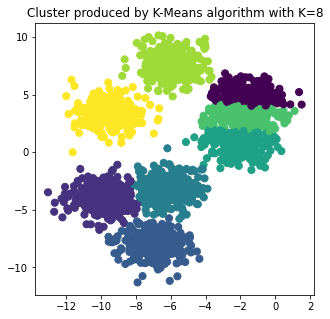

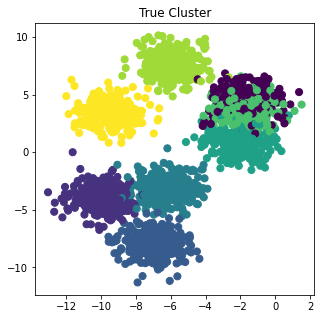

In [179]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_k8_kmeans, s=50, cmap='viridis')
plt.title('Cluster produced by K-Means algorithm with K=8')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=actual_y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

In [180]:
conf_matrix = confusion_matrix(actual_y, y_k8_kmeans, labels=[0, 1, 2, 3, 4, 5, 6, 7])
print(conf_matrix)
print(classification_report(actual_y, y_k8_kmeans))

[[164   0   0   0   1  84   1   0]
 [  0 247   0   2   0   0   0   1]
 [  0   1 246   3   0   0   0   0]
 [  0  12   0 237   1   0   0   0]
 [  1   0   0   0 229  20   0   0]
 [ 89   0   0   0   7 154   0   0]
 [  1   0   0   0   0   0 249   0]
 [  0   0   0   0   0   0   1 249]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       250
           1       0.95      0.99      0.97       250
           2       1.00      0.98      0.99       250
           3       0.98      0.95      0.96       250
           4       0.96      0.92      0.94       250
           5       0.60      0.62      0.61       250
           6       0.99      1.00      0.99       250
           7       1.00      1.00      1.00       250

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



***
## Section: 2.4 - Record Your Observations

Base on these experiments, K-Means algorithm works good since the accuracy, precision, and f1-score of the predicted y are high. And I also notice that the higher the K value, the lower the WSS; the higher the K value, the higher the BSS and the higher the running time.

I preferred the clustering with K = 8. From the graph of WSS, we can see that the WSS of clustering with K = 8 is much lower the WSS of clustering with K = 6 while the difference between the WSS of clustering with K = 8 and the WSS of clustering with K = 10 is relatively indistinguishable. And the BSS of clustering with K = 8 is much higher than the BSS of clustering with K = 6 while the difference between the BSS of clustering with K = 8 and the BSS of clustering with K = 10 is relatively small. The running time of clustering with K = 8 is longer than the running time of clustering with K = 6 but shorter than the running time of clustering with K = 10. So we can conclude that the clustering with K = 8 performs better and spends relatively little time.
***

<ipython-input-177-90c825d167ec>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


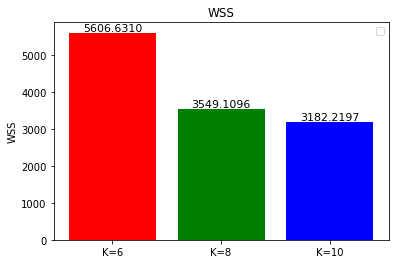

<ipython-input-177-90c825d167ec>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


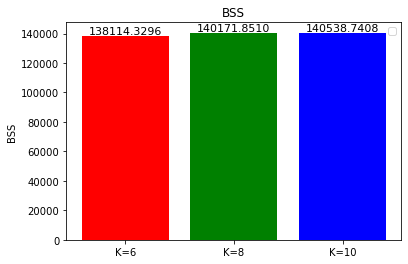

<ipython-input-177-90c825d167ec>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(sse_list)), sse_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


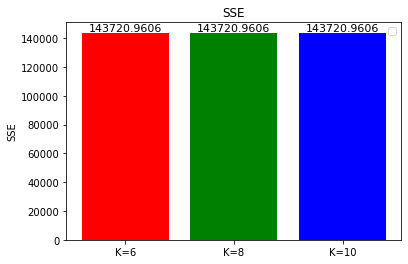

<ipython-input-177-90c825d167ec>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


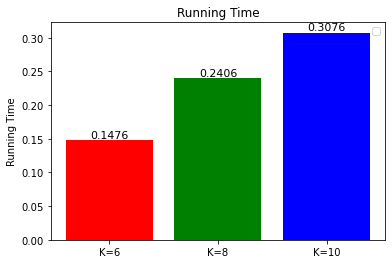

In [177]:
name_list = ['K=6','K=8','K=10']
wss_list = [WSS_k6,WSS_k8,WSS_k10]
bss_list = [BSS_k6,BSS_k8,BSS_k10]
sse_list = [SSE_k6,SSE_k8,SSE_k10]
t_list = [t_k6,t_k8,t_k10]

plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
plt.text(0, WSS_k6+0.05, format(WSS_k6, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, WSS_k8+0.05, format(WSS_k8, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, WSS_k10+0.05, format(WSS_k10, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('WSS')
plt.ylabel('WSS')
plt.legend()
plt.show()

plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
plt.text(0, BSS_k6+0.05, format(BSS_k6, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, BSS_k8+0.05, format(BSS_k8, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, BSS_k10+0.05, format(BSS_k10, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('BSS')
plt.ylabel('BSS')
plt.legend()
plt.show()

plt.bar(range(len(sse_list)), sse_list, color='rgb', tick_label=name_list)
plt.text(0, SSE_k6+0.05, format(SSE_k6, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, SSE_k8+0.05, format(SSE_k8, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, SSE_k10+0.05, format(SSE_k10, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('SSE')
plt.ylabel('SSE')
plt.legend()
plt.show()

plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
plt.text(0, t_k6+0.0001, format(t_k6, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, t_k8+0.0001, format(t_k8, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, t_k10+0.0001, format(t_k10, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('Running Time')
plt.ylabel('Running Time')
plt.legend()
plt.show()

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset

***
## Section: 3.1 - Calculate True Cluster Measures
- Based on the given y, the WSS is 1277.6161624690644, the BSS is 801.5364401177087, and the SSE is 2079.1526025867734
***

In [317]:
y = np.array(large2_Xydf)
actual_y = np.array(large2_Xydf['y'])
y0 = np.array(large2_Xydf[large2_Xydf['y'].isin(['0'])])
y1 = np.array(large2_Xydf[large2_Xydf['y'].isin(['1'])])

y = y[:, 1:-1]
y0 = y0[:, 1:-1]
y1 = y1[:, 1:-1]

y_cluster = np.array([y0,y1])

y_cluster_mean = np.zeros(shape=[2, 2])

for i in range(y_cluster.shape[0]):
    for j in range(y_cluster[i].shape[0]):
        y_cluster_mean[i,0] += y_cluster[i][j,0]
        y_cluster_mean[i,1] += y_cluster[i][j,1]
for i in range(y_cluster_mean.shape[0]):
    y_cluster_mean[i,0] = y_cluster_mean[i,0]/y_cluster[i].shape[0]
    y_cluster_mean[i,1] = y_cluster_mean[i,1]/y_cluster[i].shape[0]

y_mean = [0, 0]
for i in range(y.shape[0]):
    y_mean[0] += y[i,0]
    y_mean[1] += y[i,1]

y_mean[0] = y_mean[0]/y.shape[0]
y_mean[1] = y_mean[1]/y.shape[0] 

WSS = 0
for i in range(y_cluster.shape[0]):
    for j in range(y_cluster[i].shape[0]):
        WSS += (y_cluster[i][j,0] - y_cluster_mean[i,0])*(y_cluster[i][j,0] - y_cluster_mean[i,0]) + (y_cluster[i][j,1] - y_cluster_mean[i,1])*(y_cluster[i][j,1] - y_cluster_mean[i,1])

BSS = 0
for i in range(y_cluster.shape[0]):
    BSS += ((y_mean[0]-y_cluster_mean[i,0])*(y_mean[0]-y_cluster_mean[i,0])+(y_mean[1]-y_cluster_mean[i,1])*(y_mean[1]-y_cluster_mean[i,1]))*y_cluster[i].shape[0] 

SSE = WSS + BSS

print("WSS is", WSS)
print("BSS is", BSS)
print("SSE is", SSE)

WSS is 1277.6161624690644
BSS is 801.5364401177087
SSE is 2079.1526025867734


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- n_clusters is the number of clusters to form as well as the number of centroids to generate. I set it to 2 as default value, but I will change it to 3 and 4 for testing the K-Means algorithm's performance with different numbers of clusters.
- init is method for initialization. I set it to it's default value 'k-means++'.
- n_init is number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. I set it to it's default value.
- max_iter is maximum number of iterations of the k-means algorithm for a single run. I set it to it's default value.
- tol is relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence. I set it to it's default value.
- precompute_distances is precompute distances (faster but takes more memory). It has 3 options as I list as follow. ‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision; True : always precompute distances; False : never precompute distances. I set it to it's default value.
- verbose is verbosity mode. I set it to it's default value.
- random_state determines random number generation for centroid initialization. Use an int to make the randomness deterministic. I set it to it's default value.
- copy_x: When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False. I set it to it's default value.
- n_jobs is the number of OpenMP threads to use for the computation. Parallelism is sample-wise on the main cython loop which assigns each sample to its closest center. None or -1 means using all processors. I set it to it's default value.
- algorithm is K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient on data with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters). I set it to it's default value.

In the situation that K = 2, the WSS is 865.0022865346041, the BSS is 1214.16560694565, the SSE is 2079.167893480254, and the running time is 0.1010920000000084

In the situation that K = 3, the WSS is 590.27319873305, the BSS is 1488.8946947472016, the SSE is 2079.1678934802517, and the running time is 0.21580000000000155

In the situation that K = 4，the WSS is WSS is 392.6907714192174, the BSS is 1686.4771220610357, the SSE is 2079.167893480253, and the running time is 0.2473150000000004

Reference: sklearn.cluster.KMeans documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
***

In [181]:
KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
             precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, 
             n_jobs='deprecated', algorithm='auto')

X = large2_Xydf.iloc[:, 1:-1]
X = X.to_numpy()

In [182]:
# k=2
t0 = time.process_time()
kmeans = KMeans(n_clusters = 2).fit(X)
y_k2_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k2 = t1-t0 #running time

y0_k2 = np.empty(shape=[0, 2])
y1_k2 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k2_kmeans[i] == 0:
        y0_k2 = np.vstack((y0_k2,X[i]))
    elif y_k2_kmeans[i] == 1:
        y1_k2 = np.vstack((y1_k2,X[i]))

y_k2 = np.array([y0_k2,y1_k2])

y_k2_mean = np.zeros(shape=[2, 2])

for i in range(y_k2.shape[0]):
    for j in range(y_k2[i].shape[0]):
        y_k2_mean[i,0] += y_k2[i][j,0]
        y_k2_mean[i,1] += y_k2[i][j,1]
for i in range(y_k2_mean.shape[0]):
    y_k2_mean[i,0] = y_k2_mean[i,0]/y_k2[i].shape[0]
    y_k2_mean[i,1] = y_k2_mean[i,1]/y_k2[i].shape[0]

WSS_k2 = 0
for i in range(y_k2.shape[0]):
    for j in range(y_k2[i].shape[0]):
        WSS_k2 += (y_k2[i][j,0] - y_k2_mean[i,0])*(y_k2[i][j,0] - y_k2_mean[i,0]) + (y_k2[i][j,1] - y_k2_mean[i,1])*(y_k2[i][j,1] - y_k2_mean[i,1])

BSS_k2 = 0
for i in range(y_k2.shape[0]):
    BSS_k2 += ((y_mean[0]-y_k2_mean[i,0])*(y_mean[0]-y_k2_mean[i,0])+(y_mean[1]-y_k2_mean[i,1])*(y_mean[1]-y_k2_mean[i,1]))*y_k2[i].shape[0] 

SSE_k2 = WSS_k2 + BSS_k2

print("K = 2: ")
print("WSS is", WSS_k2)
print("BSS is", BSS_k2)
print("SSE is", SSE_k2)
print("Running time is", t_k2)    

K = 2: 
WSS is 865.0022865346041
BSS is 1214.16560694565
SSE is 2079.167893480254
Running time is 0.1010920000000084


In [189]:
# k=3
t0 = time.process_time()
kmeans = KMeans(n_clusters = 3).fit(X)
y_k3_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k3 = t1-t0 #running time

y0_k3 = np.empty(shape=[0, 2])
y1_k3 = np.empty(shape=[0, 2])
y2_k3 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k3_kmeans[i] == 0:
        y0_k3 = np.vstack((y0_k3,X[i]))
    elif y_k3_kmeans[i] == 1:
        y1_k3 = np.vstack((y1_k3,X[i]))
    elif y_k3_kmeans[i] == 2:
        y2_k3 = np.vstack((y2_k3,X[i]))

y_k3 = np.array([y0_k3,y1_k3,y2_k3])

y_k3_mean = np.zeros(shape=[3, 2])

for i in range(y_k3.shape[0]):
    for j in range(y_k3[i].shape[0]):
        y_k3_mean[i,0] += y_k3[i][j,0]
        y_k3_mean[i,1] += y_k3[i][j,1]
for i in range(y_k3_mean.shape[0]):
    y_k3_mean[i,0] = y_k3_mean[i,0]/y_k3[i].shape[0]
    y_k3_mean[i,1] = y_k3_mean[i,1]/y_k3[i].shape[0]

WSS_k3 = 0
for i in range(y_k3.shape[0]):
    for j in range(y_k3[i].shape[0]):
        WSS_k3 += (y_k3[i][j,0] - y_k3_mean[i,0])*(y_k3[i][j,0] - y_k3_mean[i,0]) + (y_k3[i][j,1] - y_k3_mean[i,1])*(y_k3[i][j,1] - y_k3_mean[i,1])

BSS_k3 = 0
for i in range(y_k3.shape[0]):
    BSS_k3 += ((y_mean[0]-y_k3_mean[i,0])*(y_mean[0]-y_k3_mean[i,0])+(y_mean[1]-y_k3_mean[i,1])*(y_mean[1]-y_k3_mean[i,1]))*y_k3[i].shape[0] 

SSE_k3 = WSS_k3 + BSS_k3

print("K = 3: ")
print("WSS is", WSS_k3)
print("BSS is", BSS_k3)
print("SSE is", SSE_k3)
print("Running time is", t_k3)    

K = 3: 
WSS is 590.286474462759
BSS is 1488.881419017493
SSE is 2079.167893480252
Running time is 0.21580000000000155


In [190]:
# k=4
t0 = time.process_time()
kmeans = KMeans(n_clusters = 4).fit(X)
y_k4_kmeans = kmeans.predict(X)
t1 = time.process_time()
t_k4 = t1-t0 #running time

y0_k4 = np.empty(shape=[0, 2])
y1_k4 = np.empty(shape=[0, 2])
y2_k4 = np.empty(shape=[0, 2])
y3_k4 = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_k4_kmeans[i] == 0:
        y0_k4 = np.vstack((y0_k4,X[i]))
    elif y_k4_kmeans[i] == 1:
        y1_k4 = np.vstack((y1_k4,X[i]))
    elif y_k4_kmeans[i] == 2:
        y2_k4 = np.vstack((y2_k4,X[i]))
    elif y_k4_kmeans[i] == 3:
        y3_k4 = np.vstack((y3_k4,X[i]))

y_k4 = np.array([y0_k4,y1_k4,y2_k4,y3_k4])

y_k4_mean = np.zeros(shape=[4, 2])

for i in range(y_k4.shape[0]):
    for j in range(y_k4[i].shape[0]):
        y_k4_mean[i,0] += y_k4[i][j,0]
        y_k4_mean[i,1] += y_k4[i][j,1]
for i in range(y_k4_mean.shape[0]):
    y_k4_mean[i,0] = y_k4_mean[i,0]/y_k4[i].shape[0]
    y_k4_mean[i,1] = y_k4_mean[i,1]/y_k4[i].shape[0]

WSS_k4 = 0
for i in range(y_k4.shape[0]):
    for j in range(y_k4[i].shape[0]):
        WSS_k4 += (y_k4[i][j,0] - y_k4_mean[i,0])*(y_k4[i][j,0] - y_k4_mean[i,0]) + (y_k4[i][j,1] - y_k4_mean[i,1])*(y_k4[i][j,1] - y_k4_mean[i,1])

BSS_k4 = 0
for i in range(y_k4.shape[0]):
    BSS_k4 += ((y_mean[0]-y_k4_mean[i,0])*(y_mean[0]-y_k4_mean[i,0])+(y_mean[1]-y_k4_mean[i,1])*(y_mean[1]-y_k4_mean[i,1]))*y_k4[i].shape[0] 

SSE_k4 = WSS_k4 + BSS_k4

print("K = 4: ")
print("WSS is", WSS_k4)
print("BSS is", BSS_k4)
print("SSE is", SSE_k4)
print("Running time is", t_k4)    

K = 4: 
WSS is 392.6747888151345
BSS is 1686.4931046651182
SSE is 2079.1678934802526
Running time is 0.2473150000000004


***
## Section: 3.3 - For the K=2 Case Above:

The scatterplots of cluster produced by K-Means algorithm with K=2 and the true cluster are showing below.
The confusion matrix and the report matrix are showing below. We can see that the precision, recall, F1, and accuracy are all 0.76.
***

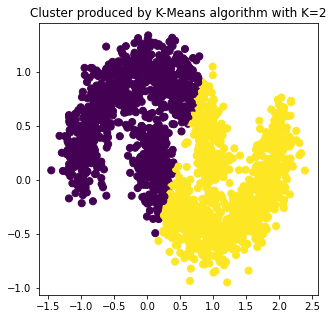

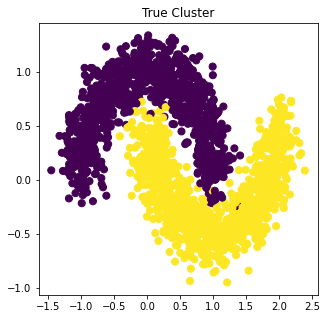

[[758 242]
 [234 766]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.76      0.77      0.76      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [193]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_k2_kmeans, s=50, cmap='viridis')
plt.title('Cluster produced by K-Means algorithm with K=2')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=actual_y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

conf_matrix = confusion_matrix(actual_y, y_k2_kmeans, labels=[0, 1])
print(conf_matrix)
print(classification_report(actual_y, y_k2_kmeans))

***
## Section: 3.4 - Record Your Observations

Base on these experiments, K-Means algorithm doesn't work wery well since the accuracy, precision, and f1-score of the predicted y are not so high. And I also notice that the higher the K value, the lower the WSS; the higher the K value, the higher the BSS and the higher the running time.

I preferred the clustering with K = 4. From the graph of WSS, we can see that the clustering with K = 4 has lowest WSS and highest BSS. Although the running time of the clustering with K = 4 is the highest, it still acceptable. Thus, I preferred the clustering with K = 4.
***

<ipython-input-191-5e856db61f4f>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


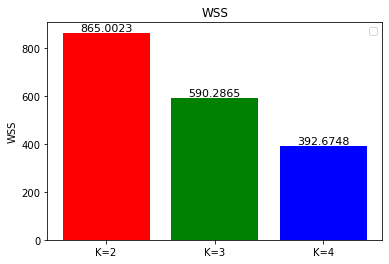

<ipython-input-191-5e856db61f4f>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


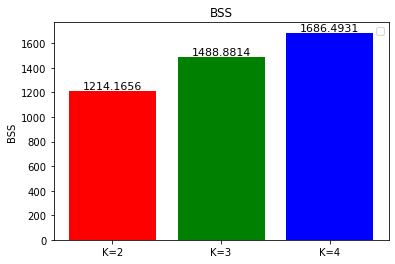

<ipython-input-191-5e856db61f4f>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(sse_list)), sse_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


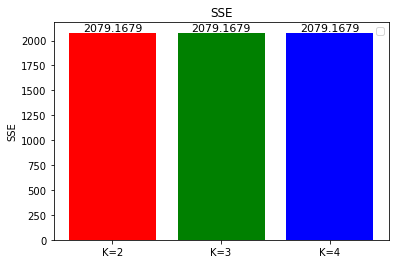

<ipython-input-191-5e856db61f4f>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


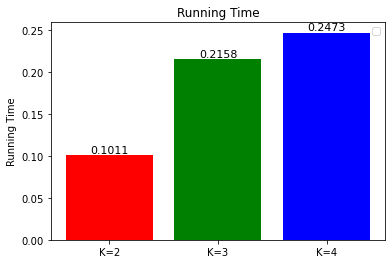

In [191]:
name_list = ['K=2','K=3','K=4']
wss_list = [WSS_k2,WSS_k3,WSS_k4]
bss_list = [BSS_k2,BSS_k3,BSS_k4]
sse_list = [SSE_k2,SSE_k3,SSE_k4]
t_list = [t_k2,t_k3,t_k4]

plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
plt.text(0, WSS_k2+0.05, format(WSS_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, WSS_k3+0.05, format(WSS_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, WSS_k4+0.05, format(WSS_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('WSS')
plt.ylabel('WSS')
plt.legend()
plt.show()

plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
plt.text(0, BSS_k2+0.05, format(BSS_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, BSS_k3+0.05, format(BSS_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, BSS_k4+0.05, format(BSS_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('BSS')
plt.ylabel('BSS')
plt.legend()
plt.show()

plt.bar(range(len(sse_list)), sse_list, color='rgb', tick_label=name_list)
plt.text(0, SSE_k2+0.05, format(SSE_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, SSE_k3+0.05, format(SSE_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, SSE_k4+0.05, format(SSE_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('SSE')
plt.ylabel('SSE')
plt.legend()
plt.show()

plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
plt.text(0, t_k2+0.0001, format(t_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, t_k3+0.0001, format(t_k3, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, t_k4+0.0001, format(t_k4, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('Running Time')
plt.ylabel('Running Time')
plt.legend()
plt.show()

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  

- AgglomerativeClustering

I am going to use Agglomerative Clustering on the Large2 dataset because it may correspond to meaningful taxonomies and it's less susceptible to noise and outliers.
***

In [264]:
X = np.array(large2_Xydf)
X = X[:, 1:-1]
Y = np.array(large2_Xydf['y'])

x_mean = [0,0]
for i in range(X.shape[0]):
    x_mean[0] += X[i,0]
    x_mean[1] += X[i,1]

x_mean[0] = x_mean[0]/X.shape[0]
x_mean[1] = x_mean[1]/X.shape[0]  

***
## Section: 4.2 - Configure and Run the Algorithm

- n_clusters is the number of clusters to find. It must be None if distance_threshold is not None. I set it to it's default value.

- affinity is metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method. I set it to it's default value.

- memory is used to cache the output of the computation of the tree. By default, no caching is done. If a string is given, it is the path to the caching directory. I set it to it's default value.

- connectivity is connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data. This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured. I set it to it's default value.

- compute_full_tree stops early the construction of the tree at n_clusters. This is useful to decrease computation time if the number of clusters is not small compared to the number of samples. This option is useful only when specifying a connectivity matrix. Note also that when varying the number of clusters and using caching, it may be advantageous to compute the full tree. It must be True if distance_threshold is not None. By default compute_full_tree is “auto”, which is equivalent to True when distance_threshold is not None or that n_clusters is inferior to the maximum between 100 or 0.02 * n_samples. Otherwise, “auto” is equivalent to False. I set it to it's default value.

- linkage determines which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. 'ward' minimizes the variance of the clusters being merged. 'average' uses the average of the distances of each observation of the two sets. 'complete' linkage uses the maximum distances between all observations of the two sets. 'single' uses the minimum of the distances between all observations of the two sets. I set it to it's default value 'ward', but I will change it to 'complete', 'average' for testing the AgglomerativeClustering algorithm's performance with different kinds of linkages.

- distance_threshold is the linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True. I set it to it's default value.


For AgglomerativeClustering with linkage='ward', the WSS is 1072.7542743817844, the BSS is 1006.3983282049852, the SSE is 2079.1526025867697, and the running time is 0.09246500000000424. The scatterplots, confusion matrix, and basic measures are showing below.

For AgglomerativeClustering with linkage='complete', the WSS is 923.7282174306954, the BSS is 1155.4243851560768, the SSE is 2079.1526025867724, and the running time is 0.07888400000000217. The scatterplots, confusion matrix, and basic measures are showing below.

For AgglomerativeClustering with linkage='average', the WSS is 1016.6546766536968, the BSS is 1062.4979259330744, the SSE is 2079.152602586771, and the running time is 0.07303400000000693. The scatterplots, confusion matrix, and basic measures are showing below.

Reference: sklearn.cluster.AgglomerativeClustering documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn-cluster-agglomerativeclustering
***

In [249]:
AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, 
                        compute_full_tree='auto', linkage='ward', distance_threshold=None)

linkage='ward': 
WSS is 1072.7542743817844
BSS is 1006.3983282049852
SSE is 2079.1526025867697
Running time is 0.10843600000001175


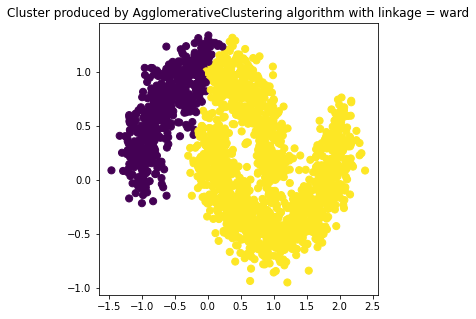

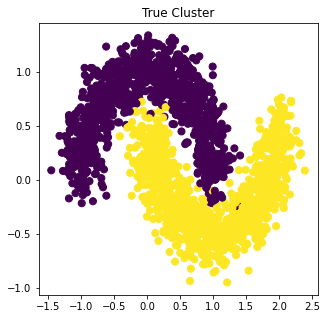

[[511 489]
 [  9 991]]
              precision    recall  f1-score   support

           0       0.98      0.51      0.67      1000
           1       0.67      0.99      0.80      1000

    accuracy                           0.75      2000
   macro avg       0.83      0.75      0.74      2000
weighted avg       0.83      0.75      0.74      2000



In [259]:
# linkage='ward'
t0 = time.process_time()
ac = AgglomerativeClustering(linkage='ward').fit(X)
y_ward = ac.labels_
t1 = time.process_time()
t_ward = t1-t0 #running time

x0_ac = np.empty(shape=[0, 2])
x1_ac = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_ward[i] == 0:
        x0_ac = np.vstack((x0_ac,X[i]))
    elif y_ward[i] == 1:
        x1_ac = np.vstack((x1_ac,X[i]))

x_ac = np.array([x0_ac,x1_ac])
x_ac_mean = np.zeros(shape=[2, 2])

for i in range(x_ac.shape[0]):
    for j in range(x_ac[i].shape[0]):
        x_ac_mean[i,0] += x_ac[i][j,0]
        x_ac_mean[i,1] += x_ac[i][j,1]
for i in range(x_ac_mean.shape[0]):
    x_ac_mean[i,0] = x_ac_mean[i,0]/x_ac[i].shape[0]
    x_ac_mean[i,1] = x_ac_mean[i,1]/x_ac[i].shape[0]

WSS_ward = 0
for i in range(x_ac.shape[0]):
    for j in range(x_ac[i].shape[0]):
        WSS_ward += (x_ac[i][j,0] - x_ac_mean[i,0])*(x_ac[i][j,0] - x_ac_mean[i,0]) + (x_ac[i][j,1] - x_ac_mean[i,1])*(x_ac[i][j,1] - x_ac_mean[i,1])

BSS_ward = 0
for i in range(x_ac.shape[0]):
    BSS_ward += ((x_mean[0]-x_ac_mean[i,0])*(x_mean[0]-x_ac_mean[i,0])+(x_mean[1]-x_ac_mean[i,1])*(x_mean[1]-x_ac_mean[i,1]))*x_ac[i].shape[0] 

SSE_ward = WSS_ward + BSS_ward

print("linkage='ward': ")
print("WSS is", WSS_ward)
print("BSS is", BSS_ward)
print("SSE is", SSE_ward)
print("Running time is", t_ward) 

for i in range(y_ward.shape[0]):
    if y_ward[i] == 1:
        y_ward[i] = 0
    elif y_ward[i] == 0:
        y_ward[i] = 1

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_ward, s=50, cmap='viridis')
plt.title('Cluster produced by AgglomerativeClustering algorithm with linkage = ward')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

conf_matrix = confusion_matrix(Y, y_ward, labels=[0, 1])
print(conf_matrix)
print(classification_report(Y, y_ward))

linkage='complete': 
WSS is 923.7282174306954
BSS is 1155.4243851560768
SSE is 2079.1526025867724
Running time is 0.07888400000000217


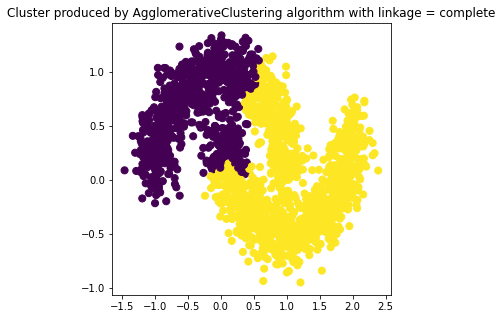

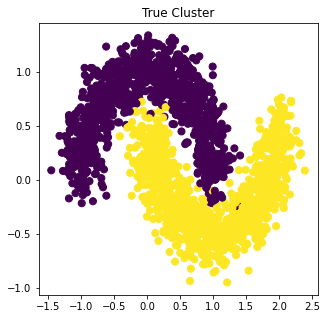

[[656 344]
 [134 866]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.73      1000
           1       0.72      0.87      0.78      1000

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



In [261]:
# linkage='complete'
t0 = time.process_time()
ac = AgglomerativeClustering(linkage='complete').fit(X)
y_comp = ac.labels_
t1 = time.process_time()
t_comp = t1-t0 #running time

x0_ac = np.empty(shape=[0, 2])
x1_ac = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_comp[i] == 0:
        x0_ac = np.vstack((x0_ac,X[i]))
    elif y_comp[i] == 1:
        x1_ac = np.vstack((x1_ac,X[i]))

x_ac = np.array([x0_ac,x1_ac])
x_ac_mean = np.zeros(shape=[2, 2])

for i in range(x_ac.shape[0]):
    for j in range(x_ac[i].shape[0]):
        x_ac_mean[i,0] += x_ac[i][j,0]
        x_ac_mean[i,1] += x_ac[i][j,1]
for i in range(x_ac_mean.shape[0]):
    x_ac_mean[i,0] = x_ac_mean[i,0]/x_ac[i].shape[0]
    x_ac_mean[i,1] = x_ac_mean[i,1]/x_ac[i].shape[0]

WSS_comp = 0
for i in range(x_ac.shape[0]):
    for j in range(x_ac[i].shape[0]):
        WSS_comp += (x_ac[i][j,0] - x_ac_mean[i,0])*(x_ac[i][j,0] - x_ac_mean[i,0]) + (x_ac[i][j,1] - x_ac_mean[i,1])*(x_ac[i][j,1] - x_ac_mean[i,1])

BSS_comp = 0
for i in range(x_ac.shape[0]):
    BSS_comp += ((x_mean[0]-x_ac_mean[i,0])*(x_mean[0]-x_ac_mean[i,0])+(x_mean[1]-x_ac_mean[i,1])*(x_mean[1]-x_ac_mean[i,1]))*x_ac[i].shape[0] 

SSE_comp = WSS_comp + BSS_comp

print("linkage='complete': ")
print("WSS is", WSS_comp)
print("BSS is", BSS_comp)
print("SSE is", SSE_comp)
print("Running time is", t_comp) 

for i in range(y_comp.shape[0]):
    if y_comp[i] == 1:
        y_comp[i] = 0
    elif y_comp[i] == 0:
        y_comp[i] = 1

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_comp, s=50, cmap='viridis')
plt.title('Cluster produced by AgglomerativeClustering algorithm with linkage = complete')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

conf_matrix = confusion_matrix(Y, y_comp, labels=[0, 1])
print(conf_matrix)
print(classification_report(Y, y_comp))

linkage='average': 
WSS is 1016.6546766536968
BSS is 1062.4979259330744
SSE is 2079.152602586771
Running time is 0.07303400000000693


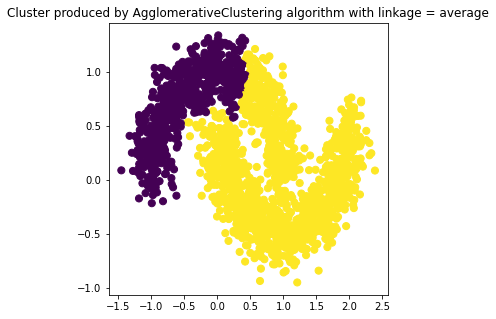

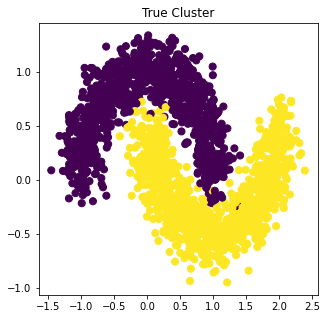

[[626 374]
 [  7 993]]
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      1000
           1       0.73      0.99      0.84      1000

    accuracy                           0.81      2000
   macro avg       0.86      0.81      0.80      2000
weighted avg       0.86      0.81      0.80      2000



In [262]:
# linkage='average'
t0 = time.process_time()
ac = AgglomerativeClustering(linkage='average').fit(X)
y_avg = ac.labels_
t1 = time.process_time()
t_avg = t1-t0 #running time

x0_ac = np.empty(shape=[0, 2])
x1_ac = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_avg[i] == 0:
        x0_ac = np.vstack((x0_ac,X[i]))
    elif y_avg[i] == 1:
        x1_ac = np.vstack((x1_ac,X[i]))

x_ac = np.array([x0_ac,x1_ac])
x_ac_mean = np.zeros(shape=[2, 2])

for i in range(x_ac.shape[0]):
    for j in range(x_ac[i].shape[0]):
        x_ac_mean[i,0] += x_ac[i][j,0]
        x_ac_mean[i,1] += x_ac[i][j,1]
for i in range(x_ac_mean.shape[0]):
    x_ac_mean[i,0] = x_ac_mean[i,0]/x_ac[i].shape[0]
    x_ac_mean[i,1] = x_ac_mean[i,1]/x_ac[i].shape[0]

WSS_avg = 0
for i in range(x_ac.shape[0]):
    for j in range(x_ac[i].shape[0]):
        WSS_avg += (x_ac[i][j,0] - x_ac_mean[i,0])*(x_ac[i][j,0] - x_ac_mean[i,0]) + (x_ac[i][j,1] - x_ac_mean[i,1])*(x_ac[i][j,1] - x_ac_mean[i,1])

BSS_avg = 0
for i in range(x_ac.shape[0]):
    BSS_avg += ((x_mean[0]-x_ac_mean[i,0])*(x_mean[0]-x_ac_mean[i,0])+(x_mean[1]-x_ac_mean[i,1])*(x_mean[1]-x_ac_mean[i,1]))*x_ac[i].shape[0] 

SSE_avg = WSS_avg + BSS_avg

print("linkage='average': ")
print("WSS is", WSS_avg)
print("BSS is", BSS_avg)
print("SSE is", SSE_avg)
print("Running time is", t_avg) 

for i in range(y_avg.shape[0]):
    if y_avg[i] == 1:
        y_avg[i] = 0
    elif y_avg[i] == 0:
        y_avg[i] = 1

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_avg, s=50, cmap='viridis')
plt.title('Cluster produced by AgglomerativeClustering algorithm with linkage = average')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

conf_matrix = confusion_matrix(Y, y_avg, labels=[0, 1])
print(conf_matrix)
print(classification_report(Y, y_avg))

***
## Section: 4.3 - Record Your Observations

From observation, the AgglomerativeClustering with linkage='ward' has highest WSS and lowest BSS, and the AgglomerativeClustering with linkage='complete' has lowest WSS and highest BSS among the three kinds of linkages. And the running time of the AgglomerativeClustering with linkage='complete' is much shorter than the AgglomerativeClustering with linkage='ward', and just a little bit longer than the AgglomerativeClustering with linkage='average'. Thus, I perfer the AgglomerativeClustering with linkage='complete'.
***

<ipython-input-263-a08f2bdd23c4>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


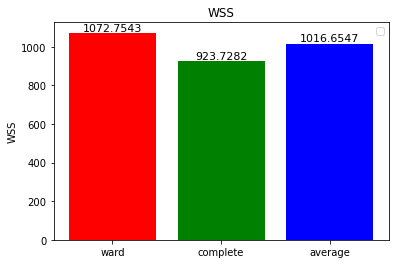

<ipython-input-263-a08f2bdd23c4>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


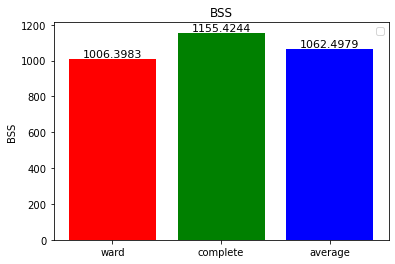

<ipython-input-263-a08f2bdd23c4>:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


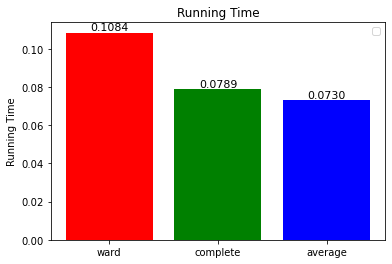

In [263]:
name_list = ['ward','complete','average']
wss_list = [WSS_ward,WSS_comp,WSS_avg]
bss_list = [BSS_ward,BSS_comp,BSS_avg]
t_list = [t_ward,t_comp,t_avg]

plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
plt.text(0, WSS_ward+0.05, format(WSS_ward, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, WSS_comp+0.05, format(WSS_comp, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, WSS_avg+0.05, format(WSS_avg, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('WSS')
plt.ylabel('WSS')
plt.legend()
plt.show()

plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
plt.text(0, BSS_ward+0.05, format(BSS_ward, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, BSS_comp+0.05, format(BSS_comp, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, BSS_avg+0.05, format(BSS_avg, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('BSS')
plt.ylabel('BSS')
plt.legend()
plt.show()

plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
plt.text(0, t_ward+0.0001, format(t_ward, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, t_comp+0.0001, format(t_comp, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, t_avg+0.0001, format(t_avg, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('Running Time')
plt.ylabel('Running Time')
plt.legend()
plt.show()

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- DBSCAN

I choose DBSCAN algorithm because it's a density-based algorithm. According to the scatterplots on Large2 dataset based on the given y, the a density-based clustering algorithm may work good on this dataset.

***
## Section: 5.2 - Configure and Run the Algorithm

- eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function. I set it to 0.1.

- min_samples is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. I set it to 5. And I will change it to 10, and 15 for testing the DBSCAN algorithm's performance with different min_samples.

- metric is the metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a Glossary, in which case only “nonzero” elements may be considered neighbors for DBSCAN. I set it to it's default value.

- metric_params is additional keyword arguments for the metric function. I set it to it's default value.

- algorithm is the algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. I set it to it's default value.

- leaf_size is leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem. I set it to it's default value.

- p is the power of the Minkowski metric to be used to calculate distance between points. I set it to it's default value.

- n_jobs is the number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. I set it to it's default value.

For DBSCAN with min_samples = 5, the WSS is 2076.463797629849, the BSS is 2.688804956923495, the SSE is 2079.1526025867724, and the running time is 0.014623000000000275. The scatterplots, confusion matrix, and basic measures are showing below.

For DBSCAN with min_samples = 10, the WSS is 2077.733025564651, the BSS is 1.4195770221197948, the SSE is 2079.152602586771, and the running time is 0.01581399999999178. The scatterplots, confusion matrix, and basic measures are showing below.

For DBSCAN with min_samples = 15, the WSS is 1344.3218604337687, the BSS is 734.8307421530044, the SSE is 2079.1526025867734, and the running time is 0.019736000000008858. The scatterplots, confusion matrix, and basic measures are showing below.

Reference: 
sklearn.cluster.DBSCAN documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
DBSCAN Parameter Estimation Using Python https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
***

min_samples = 5: 
WSS is 2076.463797629849
BSS is 2.688804956923495
SSE is 2079.1526025867724
Running time is 0.014623000000000275


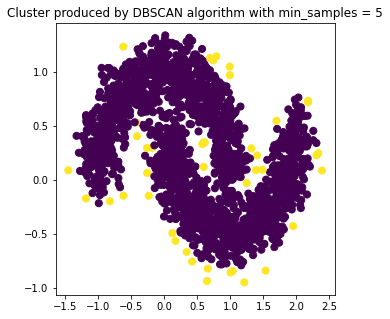

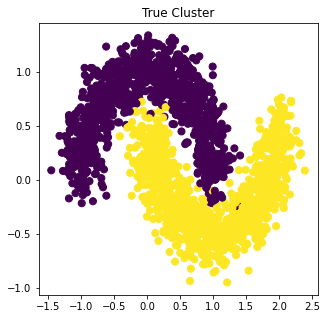

[[984  16]
 [974  26]]
              precision    recall  f1-score   support

           0       0.50      0.98      0.67      1000
           1       0.62      0.03      0.05      1000

    accuracy                           0.51      2000
   macro avg       0.56      0.51      0.36      2000
weighted avg       0.56      0.51      0.36      2000



In [312]:
# min_samples = 5
t0 = time.process_time()
db = DBSCAN(eps=0.1, min_samples=5).fit(X)
y_m5 = db.labels_
t1 = time.process_time()
t_m5 = t1-t0 #running time

x0_db = np.empty(shape=[0, 2])
x1_db = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_m5[i] == -1:
        x0_db = np.vstack((x0_db,X[i]))
    elif y_m5[i] == 0:
        x1_db = np.vstack((x1_db,X[i]))

x_db = np.array([x0_db,x1_db])
x_db_mean = np.zeros(shape=[2, 2])

for i in range(x_db.shape[0]):
    for j in range(x_db[i].shape[0]):
        x_db_mean[i,0] += x_db[i][j,0]
        x_db_mean[i,1] += x_db[i][j,1]
for i in range(x_db_mean.shape[0]):
    x_db_mean[i,0] = x_db_mean[i,0]/x_db[i].shape[0]
    x_db_mean[i,1] = x_db_mean[i,1]/x_db[i].shape[0]

WSS_m5 = 0
for i in range(x_db.shape[0]):
    for j in range(x_db[i].shape[0]):
        WSS_m5 += (x_db[i][j,0] - x_db_mean[i,0])*(x_db[i][j,0] - x_db_mean[i,0]) + (x_db[i][j,1] - x_db_mean[i,1])*(x_db[i][j,1] - x_db_mean[i,1])

BSS_m5 = 0
for i in range(x_db.shape[0]):
    BSS_m5 += ((x_mean[0]-x_db_mean[i,0])*(x_mean[0]-x_db_mean[i,0])+(x_mean[1]-x_db_mean[i,1])*(x_mean[1]-x_db_mean[i,1]))*x_db[i].shape[0] 

SSE_m5 = WSS_m5 + BSS_m5

print("min_samples = 5: ")
print("WSS is", WSS_m5)
print("BSS is", BSS_m5)
print("SSE is", SSE_m5)
print("Running time is", t_m5) 

for i in range(y_m5.shape[0]):
    if y_m5[i] == -1:
        y_m5[i] = 1
    elif y_m5[i] == 0:
        y_m5[i] = 0

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_m5, s=50, cmap='viridis')
plt.title('Cluster produced by DBSCAN algorithm with min_samples = 5')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

conf_matrix = confusion_matrix(Y, y_m5, labels=[0, 1])
print(conf_matrix)
print(classification_report(Y, y_m5))

min_samples = 10: 
WSS is 2077.733025564651
BSS is 1.4195770221197948
SSE is 2079.152602586771
Running time is 0.01581399999999178


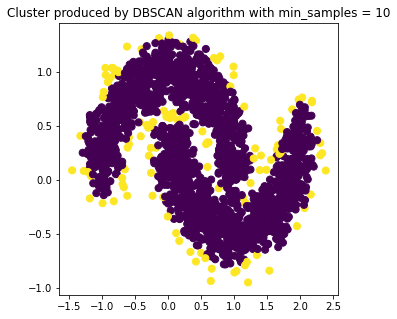

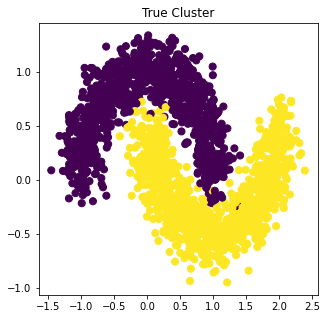

[[947  53]
 [941  59]]
              precision    recall  f1-score   support

           0       0.50      0.95      0.66      1000
           1       0.53      0.06      0.11      1000

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.38      2000
weighted avg       0.51      0.50      0.38      2000



In [311]:
# min_samples = 10
t0 = time.process_time()
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
y_m10 = db.labels_
t1 = time.process_time()
t_m10 = t1-t0 #running time

x0_db = np.empty(shape=[0, 2])
x1_db = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_m10[i] == -1:
        x0_db = np.vstack((x0_db,X[i]))
    elif y_m10[i] == 0:
        x1_db = np.vstack((x1_db,X[i]))

x_db = np.array([x0_db,x1_db])
x_db_mean = np.zeros(shape=[2, 2])

for i in range(x_db.shape[0]):
    for j in range(x_db[i].shape[0]):
        x_db_mean[i,0] += x_db[i][j,0]
        x_db_mean[i,1] += x_db[i][j,1]
for i in range(x_db_mean.shape[0]):
    x_db_mean[i,0] = x_db_mean[i,0]/x_db[i].shape[0]
    x_db_mean[i,1] = x_db_mean[i,1]/x_db[i].shape[0]

WSS_m10 = 0
for i in range(x_db.shape[0]):
    for j in range(x_db[i].shape[0]):
        WSS_m10 += (x_db[i][j,0] - x_db_mean[i,0])*(x_db[i][j,0] - x_db_mean[i,0]) + (x_db[i][j,1] - x_db_mean[i,1])*(x_db[i][j,1] - x_db_mean[i,1])

BSS_m10 = 0
for i in range(x_db.shape[0]):
    BSS_m10 += ((x_mean[0]-x_db_mean[i,0])*(x_mean[0]-x_db_mean[i,0])+(x_mean[1]-x_db_mean[i,1])*(x_mean[1]-x_db_mean[i,1]))*x_db[i].shape[0] 

SSE_m10 = WSS_m10 + BSS_m10

print("min_samples = 10: ")
print("WSS is", WSS_m10)
print("BSS is", BSS_m10)
print("SSE is", SSE_m10)
print("Running time is", t_m10) 

for i in range(y_m10.shape[0]):
    if y_m10[i] == -1:
        y_m10[i] = 1
    elif y_m10[i] == 0:
        y_m10[i] = 0
        
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_m10, s=50, cmap='viridis')
plt.title('Cluster produced by DBSCAN algorithm with min_samples = 10')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

conf_matrix = confusion_matrix(Y, y_m10, labels=[0, 1])
print(conf_matrix)
print(classification_report(Y, y_m10))

min_samples = 15: 
WSS is 1344.3218604337687
BSS is 734.8307421530044
SSE is 2079.1526025867734
Running time is 0.019736000000008858


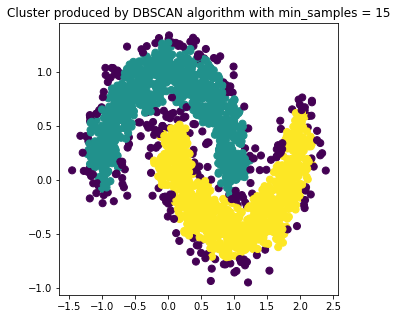

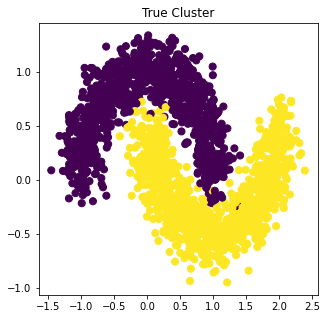

[[881   4]
 [  4 867]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.88      0.93      1000
           1       1.00      0.87      0.93      1000

    accuracy                           0.87      2000
   macro avg       0.66      0.58      0.62      2000
weighted avg       1.00      0.87      0.93      2000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [309]:
# min_samples = 15
t0 = time.process_time()
db = DBSCAN(eps=0.1, min_samples=15).fit(X)
y_m15 = db.labels_
t1 = time.process_time()
t_m15 = t1-t0 #running time

x0_db = np.empty(shape=[0, 2])
x1_db = np.empty(shape=[0, 2])
x2_db = np.empty(shape=[0, 2])

for i in range(X.shape[0]):
    if y_m15[i] == -1:
        x0_db = np.vstack((x0_db,X[i]))
    elif y_m15[i] == 0:
        x1_db = np.vstack((x1_db,X[i]))
    elif y_m15[i] == 1:
        x2_db = np.vstack((x2_db,X[i]))
        
x_db = np.array([x0_db,x1_db,x2_db])
x_db_mean = np.zeros(shape=[3, 2])

for i in range(x_db.shape[0]):
    for j in range(x_db[i].shape[0]):
        x_db_mean[i,0] += x_db[i][j,0]
        x_db_mean[i,1] += x_db[i][j,1]
for i in range(x_db_mean.shape[0]):
    x_db_mean[i,0] = x_db_mean[i,0]/x_db[i].shape[0]
    x_db_mean[i,1] = x_db_mean[i,1]/x_db[i].shape[0]

WSS_m15 = 0
for i in range(x_db.shape[0]):
    for j in range(x_db[i].shape[0]):
        WSS_m15 += (x_db[i][j,0] - x_db_mean[i,0])*(x_db[i][j,0] - x_db_mean[i,0]) + (x_db[i][j,1] - x_db_mean[i,1])*(x_db[i][j,1] - x_db_mean[i,1])

BSS_m15 = 0
for i in range(x_db.shape[0]):
    BSS_m15 += ((x_mean[0]-x_db_mean[i,0])*(x_mean[0]-x_db_mean[i,0])+(x_mean[1]-x_db_mean[i,1])*(x_mean[1]-x_db_mean[i,1]))*x_db[i].shape[0] 

SSE_m15 = WSS_m15 + BSS_m15

print("min_samples = 15: ")
print("WSS is", WSS_m15)
print("BSS is", BSS_m15)
print("SSE is", SSE_m15)
print("Running time is", t_m15) 

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_m15, s=50, cmap='viridis')
plt.title('Cluster produced by DBSCAN algorithm with min_samples = 15')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()

conf_matrix = confusion_matrix(Y, y_m15, labels=[0, 1])
print(conf_matrix)
print(classification_report(Y, y_m15))

***
## Section: 5.3 - Record Your Observations

Based on the observation, the larger the min_samples, the longer the running time. And the DBSCAN with min_samples = 10 has highest WSS and lowest BSS, while the DBSCAN with min_samples = 15 has lowest WSS and highest BSS among the three min_samples values. Also, from scatterplots, we can see that when min_samples = 15, the clusters generated by DBSCAN are most similar to the given clusters. Thus, I prefer the DBSCAN with min_samples = 15.
***

<ipython-input-313-1e38b160c8d9>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


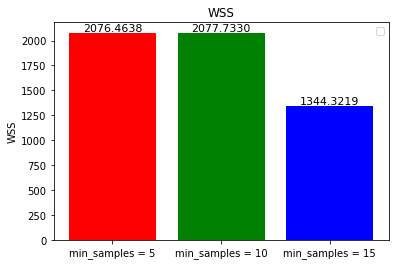

<ipython-input-313-1e38b160c8d9>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


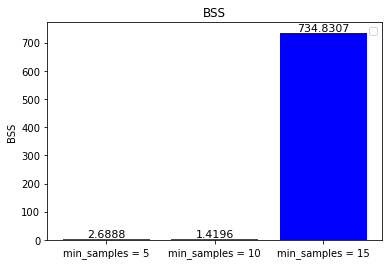

<ipython-input-313-1e38b160c8d9>:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


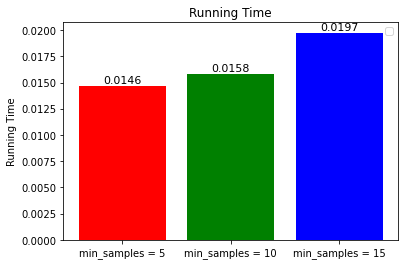

In [313]:
name_list = ['min_samples = 5','min_samples = 10','min_samples = 15']
wss_list = [WSS_m5,WSS_m10,WSS_m15]
bss_list = [BSS_m5,BSS_m10,BSS_m15]
t_list = [t_m5,t_m10,t_m15]

plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
plt.text(0, WSS_m5+0.05, format(WSS_m5, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, WSS_m10+0.05, format(WSS_m10, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, WSS_m15+0.05, format(WSS_m15, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('WSS')
plt.ylabel('WSS')
plt.legend()
plt.show()

plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
plt.text(0, BSS_m5+0.05, format(BSS_m5, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, BSS_m10+0.05, format(BSS_m10, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, BSS_m15+0.05, format(BSS_m15, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('BSS')
plt.ylabel('BSS')
plt.legend()
plt.show()

plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list)
plt.text(0, t_m5+0.0001, format(t_m5, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, t_m10+0.0001, format(t_m10, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, t_m15+0.0001, format(t_m15, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('Running Time')
plt.ylabel('Running Time')
plt.legend()
plt.show()

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset

***
## Section: 6.1 - Compare Their Performance

From the graphs showing below, we can see that the DBSCAN algorithm has the highest WSS and lowest BSS, which is pretty close to the WSS and BSS of the true clustering. The KMeans algorithm has the lowest WSS and the highest BSS, which means KMeans algorithm doesn't perform well on Large2 dataset compare with other clustering algorithms. The AgglomerativeClustering algorithm's WSS is a little bit higher than KMeans' and it BSS is a little bit lower than KMeans', which means AgglomerativeClustering algorithm just performs a little bit better than KMeans algorithm on Large2 dataset, but it much worse than DBSCAN algorithm. What's more, DBSCAN algorithm spent least time on clustering compare with other two clustering algorithms and the running time of KMeans algorithm is the longest one among the three clustering algorithms. 

From the scatterplots showing below, we can see that the scatterplot based on the clusters generated by DBSCAN algorithm nearly match the scatterplot of the true cluster while the scatterplots based on the clusters generated by other two clustering algorithms do not match the scatterplot of the true cluster very well.

Base on those experiments, the characteristics of the data might impact the clustering algorithms' performance are the dimensional of data, the amount of data, and the number of clusters.
***

<ipython-input-320-19e6e9e2c0cb>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


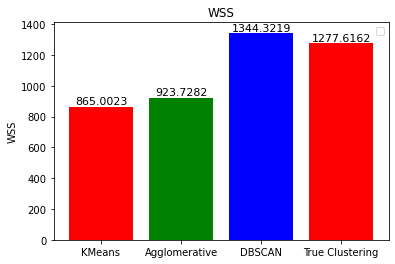

<ipython-input-320-19e6e9e2c0cb>:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


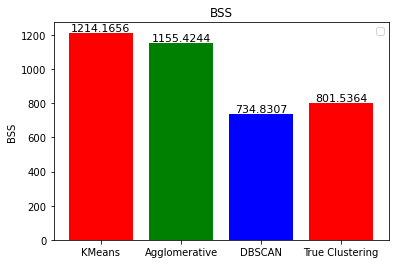

<ipython-input-320-19e6e9e2c0cb>:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list2)
No handles with labels found to put in legend.


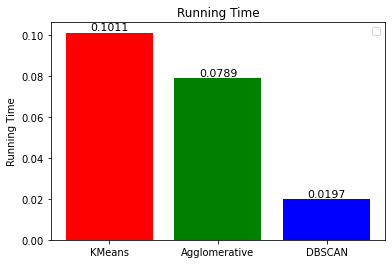

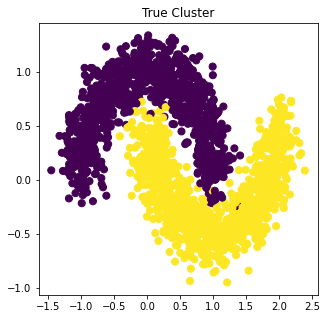

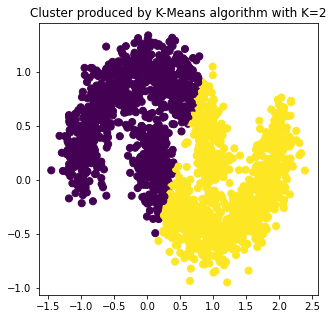

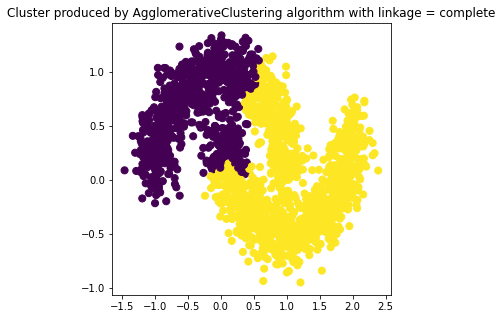

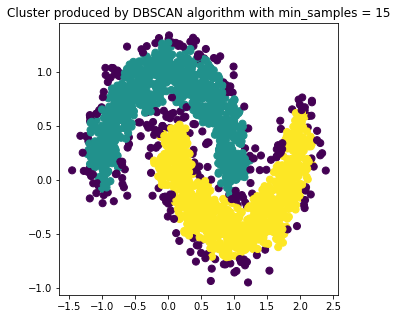

In [320]:
name_list = ['KMeans','Agglomerative','DBSCAN','True Clustering']
name_list2 = ['KMeans','Agglomerative','DBSCAN']
wss_list = [WSS_k2,WSS_comp,WSS_m15,WSS]
bss_list = [BSS_k2,BSS_comp,BSS_m15,BSS]
t_list = [t_k2,t_comp,t_m15]

plt.bar(range(len(wss_list)), wss_list, color='rgb', tick_label=name_list)
plt.text(0, WSS_k2+0.05, format(WSS_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, WSS_comp+0.05, format(WSS_comp, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, WSS_m15+0.05, format(WSS_m15, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(3, WSS+0.05, format(WSS, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('WSS')
plt.ylabel('WSS')
plt.legend()
plt.show()

plt.bar(range(len(bss_list)), bss_list, color='rgb', tick_label=name_list)
plt.text(0, BSS_k2+0.05, format(BSS_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, BSS_comp+0.05, format(BSS_comp, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, BSS_m15+0.05, format(BSS_m15, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(3, BSS+0.05, format(BSS, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('BSS')
plt.ylabel('BSS')
plt.legend()
plt.show()

plt.bar(range(len(t_list)), t_list, color='rgb', tick_label=name_list2)
plt.text(0, t_k2+0.0001, format(t_k2, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(1, t_comp+0.0001, format(t_comp, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.text(2, t_m15+0.0001, format(t_m15, '.4f'), ha='center', va= 'bottom',fontsize=11)
plt.title('Running Time')
plt.ylabel('Running Time')
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')
plt.title('True Cluster')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_k2_kmeans, s=50, cmap='viridis')
plt.title('Cluster produced by K-Means algorithm with K=2')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_comp, s=50, cmap='viridis')
plt.title('Cluster produced by AgglomerativeClustering algorithm with linkage = complete')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y_m15, s=50, cmap='viridis')
plt.title('Cluster produced by DBSCAN algorithm with min_samples = 15')
plt.show()


***
## Section: 6.2 - Choose a Best Clustering Algorithm

Based on the analysis and graphs of section 6.1, the DBSCAN algorithm wroks best on Large2 dataset.
***

***
# Section: 7 - Conclusions

From this project, I learnt how to apply different clustering algorithms in Phthon library and how to select and evaluate suitable clustering algorithms based on the characteristics of datasets. And I also learnt how to adjust the values of parameters to achieve good performance. 